In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
# Specify the file path and encoding
file_path = r"..\Data\Food_waste\Food_Waste_By_Country.csv"
encoding = 'latin1'

# Read the CSV file with the specified encoding
df = pd.read_csv(file_path, encoding=encoding)

In [3]:
print(df)

                        Country  combined figures (kg/capita/year)  \
0                   Afghanistan                                126   
1                       Albania                                127   
2                       Algeria                                135   
3                       Andorra                                123   
4                        Angola                                144   
..                          ...                                ...   
209  Venezuela (Boliv. Rep. of)                                116   
210                    Viet Nam                                120   
211                       Yemen                                148   
212                      Zambia                                122   
213                    Zimbabwe                                144   

     Household estimate (kg/capita/year)  Household estimate (tonnes/year)  \
0                                     82                           3109153   
1  

In [4]:
new_column_titles = {
    'Country': 'Country',
    'combined figures (kg/capita/year)': 'Combined_Figures_kg_per_capita_year',
    'Household estimate (kg/capita/year)': 'Household_Estimate_kg_per_capita_year',
    'Household estimate (tonnes/year)': 'Household_Estimate_tonnes_year',
    'Retail estimate (kg/capita/year)': 'Retail_Estimate_kg_per_capita_year',
    'Retail estimate (tonnes/year)': 'Retail_Estimate_tonnes_year',
    'Food service estimate (kg/capita/year)': 'Food_Service_Estimate_kg_per_capita_year',
    'Food service estimate (tonnes/year)': 'Food_Service_Estimate_tonnes_year',
    'Confidence in estimate': 'Confidence_in_Estimate',
    'M49 code': 'M49_code',
    'Region': 'Region',
    'Source': 'Source'
}

# Renaming the columns
df = df.rename(columns=new_column_titles)

print(df.head())

       Country  Combined_Figures_kg_per_capita_year  \
0  Afghanistan                                  126   
1      Albania                                  127   
2      Algeria                                  135   
3      Andorra                                  123   
4       Angola                                  144   

   Household_Estimate_kg_per_capita_year  Household_Estimate_tonnes_year  \
0                                     82                         3109153   
1                                     83                          238492   
2                                     91                         3918529   
3                                     84                            6497   
4                                    100                         3169523   

   Retail_Estimate_kg_per_capita_year  Retail_Estimate_tonnes_year  \
0                                  16                       594982   
1                                  16                        45058   
2 

In [5]:
#Checking for Missing Values
print(df.isnull().sum())
# Convert 'Confidence_in_Estimate' to categorical type
df['Confidence_in_Estimate'] = pd.Categorical(df['Confidence_in_Estimate'])
#Checking for data type conversions
print(df.dtypes)

Country                                     0
Combined_Figures_kg_per_capita_year         0
Household_Estimate_kg_per_capita_year       0
Household_Estimate_tonnes_year              0
Retail_Estimate_kg_per_capita_year          0
Retail_Estimate_tonnes_year                 0
Food_Service_Estimate_kg_per_capita_year    0
Food_Service_Estimate_tonnes_year           0
Confidence_in_Estimate                      0
M49_code                                    0
Region                                      0
Source                                      0
dtype: int64
Country                                       object
Combined_Figures_kg_per_capita_year            int64
Household_Estimate_kg_per_capita_year          int64
Household_Estimate_tonnes_year                 int64
Retail_Estimate_kg_per_capita_year             int64
Retail_Estimate_tonnes_year                    int64
Food_Service_Estimate_kg_per_capita_year       int64
Food_Service_Estimate_tonnes_year              int64
Confidence_

       Combined_Figures_kg_per_capita_year  \
count                           214.000000   
mean                            126.794393   
std                              22.157879   
min                              61.000000   
25%                             115.000000   
50%                             123.000000   
75%                             137.750000   
max                             260.000000   

       Household_Estimate_kg_per_capita_year  Household_Estimate_tonnes_year  \
count                             214.000000                    2.140000e+02   
mean                               84.294393                    2.658896e+06   
std                                18.313705                    8.596906e+06   
min                                33.000000                    8.500000e+02   
25%                                74.000000                    6.831550e+04   
50%                                80.000000                    5.205080e+05   
75%                      

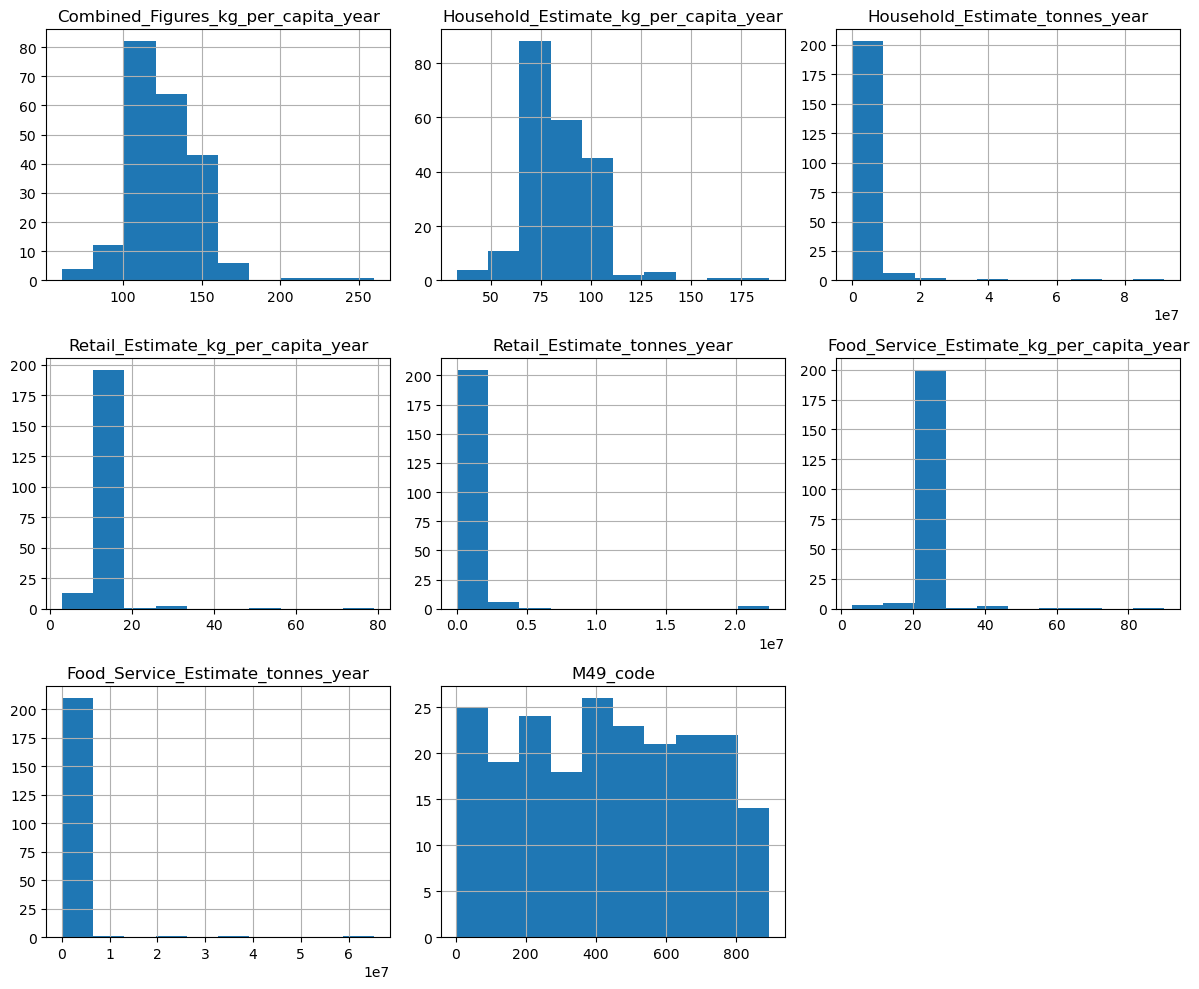

C:\Users\ricky\AppData\Local\Temp\ipykernel_18820\3844621197.py:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


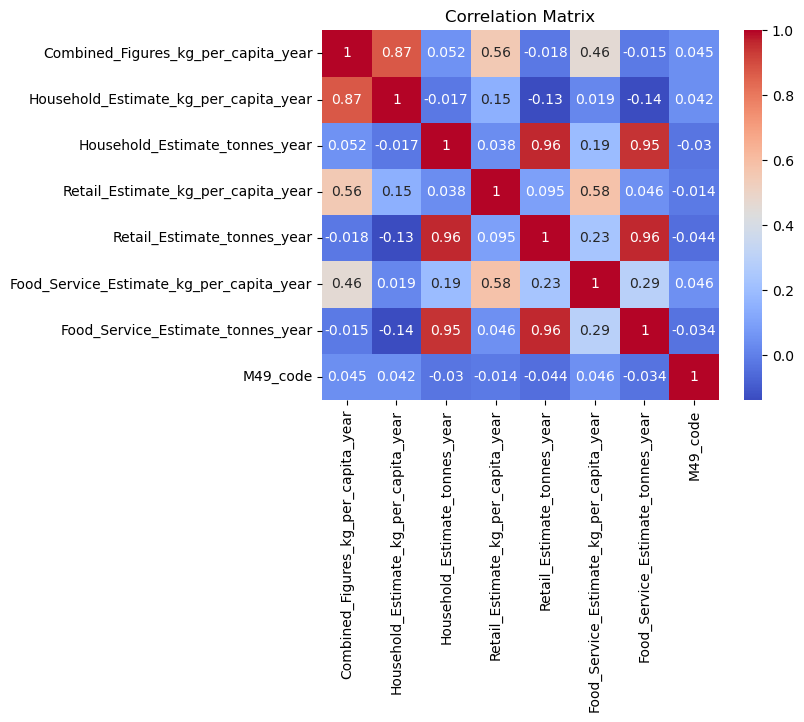

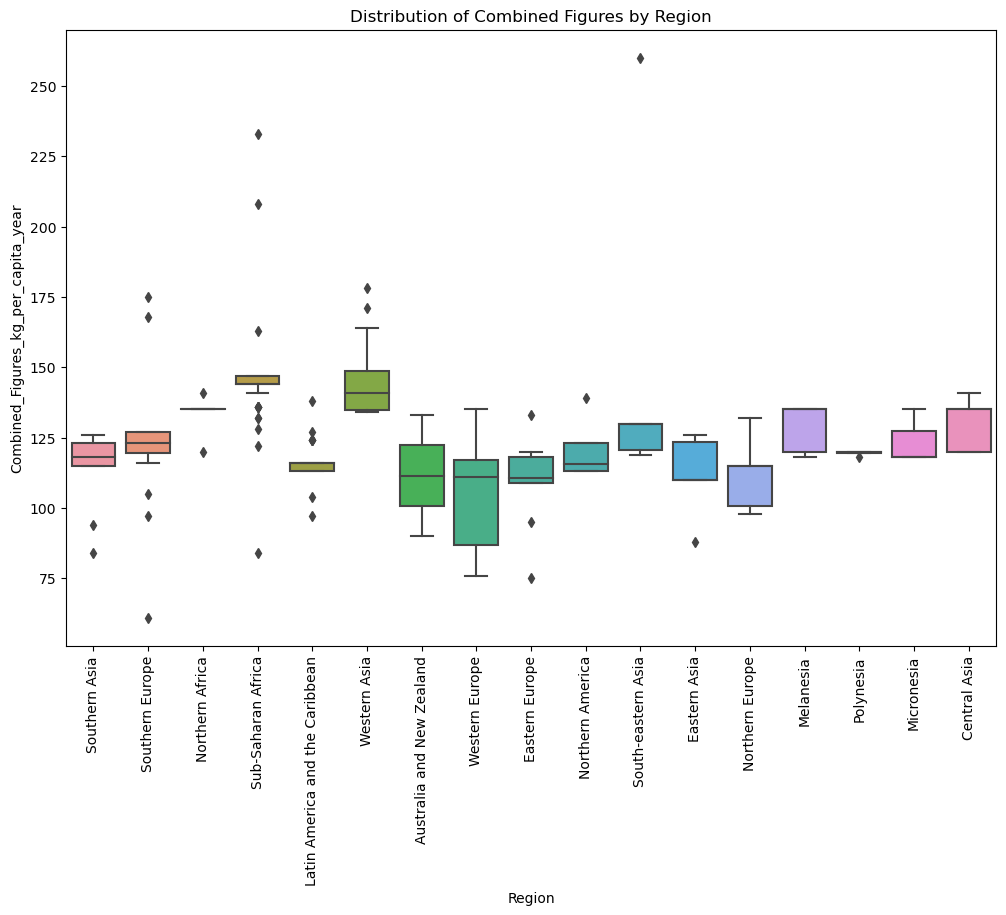

In [6]:
# Summary statistics
print(df.describe())

# Distribution of numerical features
df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

# Correlation matrix
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Boxplot for 'Combined_Figures_kg_per_capita_year' by 'Region'
plt.figure(figsize=(12, 8))
sns.boxplot(x='Region', y='Combined_Figures_kg_per_capita_year', data=df)
plt.title('Distribution of Combined Figures by Region')
plt.xticks(rotation=90)
plt.show()

In [7]:
df['Total_Consumption'] = df['Household_Estimate_tonnes_year'] + df['Retail_Estimate_tonnes_year'] + df['Food_Service_Estimate_tonnes_year']

In [8]:
df['Household_Consumption_Ratio'] = df['Household_Estimate_tonnes_year'] / df['Combined_Figures_kg_per_capita_year']
df['Retail_Consumption_Ratio'] = df['Retail_Estimate_tonnes_year'] / df['Combined_Figures_kg_per_capita_year']
df['Food_Service_Consumption_Ratio'] = df['Food_Service_Estimate_tonnes_year'] / df['Combined_Figures_kg_per_capita_year']

In [9]:
conf_mapping = {'Very Low Confidence': 0, 'Low Confidence': 1, 'Moderate Confidence': 2, 'High Confidence': 3}
df['Confidence_Encoded'] = df['Confidence_in_Estimate'].map(conf_mapping)

<Figure size 1200x800 with 0 Axes>

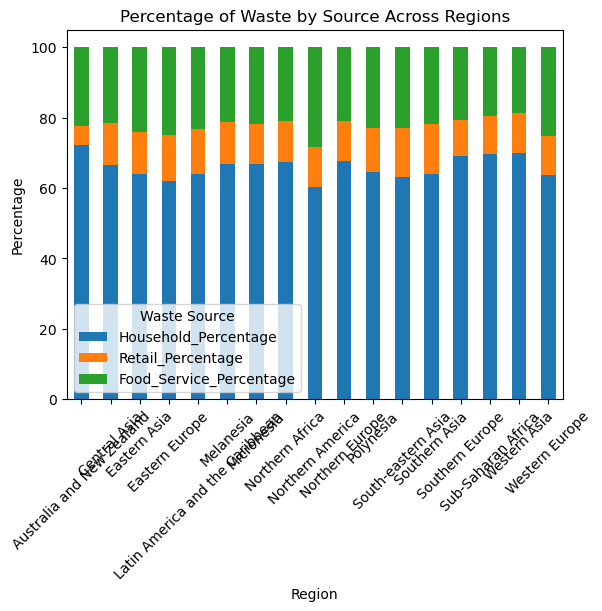

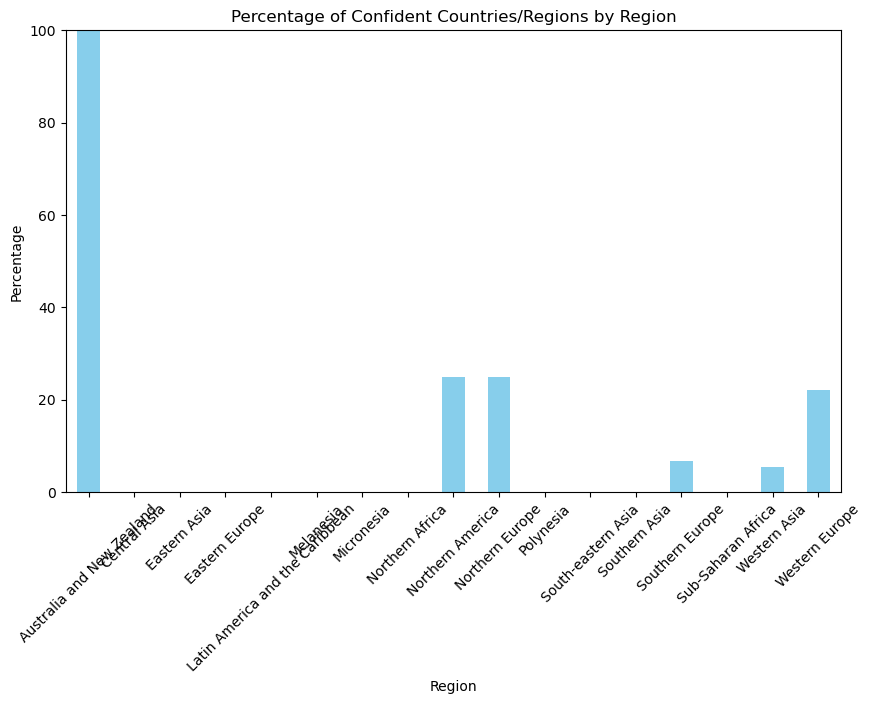

In [10]:
# Calculate the percentage of waste by source
df['Household_Percentage'] = (df['Household_Estimate_tonnes_year'] / df['Total_Consumption']) * 100
df['Retail_Percentage'] = (df['Retail_Estimate_tonnes_year'] / df['Total_Consumption']) * 100
df['Food_Service_Percentage'] = (df['Food_Service_Estimate_tonnes_year'] / df['Total_Consumption']) * 100

# Group by region and calculate the mean percentages
region_percentages = df.groupby('Region')[['Household_Percentage', 'Retail_Percentage', 'Food_Service_Percentage']].mean()

# Plot the percentages by region
plt.figure(figsize=(12, 8))
region_percentages.plot(kind='bar', stacked=True)
plt.title('Percentage of Waste by Source Across Regions')
plt.xlabel('Region')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='Waste Source')
plt.show()

# Calculate the percentage of confident countries/regions
confident_regions = df[df['Confidence_Encoded'] >= 2].groupby('Region').size() / df.groupby('Region').size() * 100

# Plot the percentage of confident countries/regions by region
plt.figure(figsize=(10, 6))
confident_regions.plot(kind='bar', color='skyblue')
plt.title('Percentage of Confident Countries/Regions by Region')
plt.xlabel('Region')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.show()
